# Linear Regression

We will use a real-life dataset containing information about size and weight for several fish species.

1. species name of fish (Bream, Roach, Whitefish, Parkki, Perch, Pike, Smelt)
2. weight of fish in grams
3. vertical length in cm (`Length1`)
4. diagonal length in cm (`Length2`)
5. cross length in cm (`Length3`)
6. height in cm
7. diagonal width in cm

Now, it tursn out that the relationship between total length (L, in inches) and total weight (W, in pounds) for nearly all species of fish can be expressed by an equation of the form

\begin{align}
W = cL^b
\end{align}

`W` is weight in pounds and `L` is length in inches. `b` is a constant that is close to 3.0 for all species and `c` is a constance that varies among species (For [northern pike](https://en.wikipedia.org/wiki/Northern_pike#Length_and_weight), for example, `b = 3.096` and `c = 0.000180`).

Nevertheless, we would like to see if we can develop a way to predict the weight of a fish given its dimensions.

## Task

**Can we predict the weight of a fish given its dimensions and species?**

## Acquiring the data
First let's load the data into a [Pandas](https://mazelife.github.io/cmsc-291/lecture_10.html#pandas) dataframe:

In [1]:
import pandas

fish_dataframe = pandas.read_csv("Fish.csv", dtype={"Species": "category"})
fish_dataframe

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Reationship between weight and length in seven species of fish

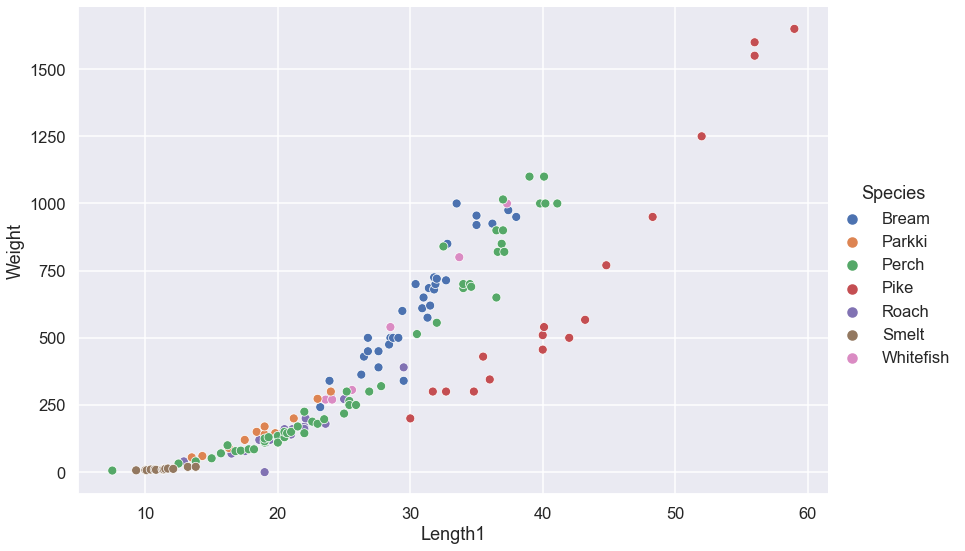

In [2]:
import seaborn
# Seaborn has various themes/styles. We'll pick a good default:
seaborn.set_theme(style="darkgrid")
seaborn.set_context("talk")

seaborn.relplot(x="Length1", y="Weight", hue="Species", data=fish_dataframe, height=8, aspect=1.5)

## Simplifying the problem

For the moment, let's attempt to do univariate linear regression. Let's take *one* measure of dimension (length) and attempt to predict weight for just one species: Pike. We'll start with a scatter plot with just the Pike data:

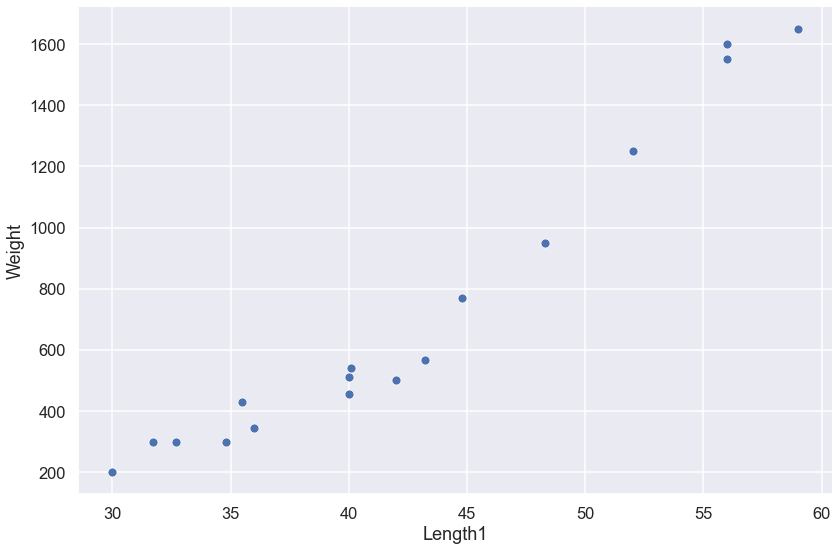

In [3]:
pike_dataframe = fish_dataframe[fish_dataframe.Species == "Pike"]
seaborn.relplot(x="Length1", y="Weight", data=pike_dataframe, height=8, aspect=1.5)

## Training a linear regression model with Scikit-Learn

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/320px-Scikit_learn_logo_small.svg.png">

Now we will train a linear regression model using the [scikit-Learn](https://scikit-learn.org/) Python library. Luciky, newer versions of this library operate pretty seamlessley with Pandas.

We will start by isolating the independent and dependent variables:

In [4]:
x = pike_dataframe[["Length1"]]  # Independent varable, AKA feature
y = pike_dataframe["Weight"]  # Dependent varable

print("NOTE: x_values is a {}, y_values is a {}.".format(type(x), type(y)))

NOTE: x_values is a <class 'pandas.core.frame.DataFrame'>, y_values is a <class 'pandas.core.series.Series'>.


Next we will create an instance of the `LinearRegression` class and then call `fit()` on it, which will train the model.

In [5]:
from sklearn.linear_model import LinearRegression

pike_model = LinearRegression()
pike_model.fit(x, y)

LinearRegression()

Once we have fit the model, we can ask it to do predictions. As we talked about last week, a linear regression model gives us an equation that describes a line. One common form for linear equations is slope-intercept form:

\begin{align}
y = mx + b \\
m = slope \\
b = intercept
\end{align}

In stats and ML the equation is formulated somewhat differently:

\begin{align}
y = \beta_0 + \beta_1x \\
\beta_0 = intercept \\
\beta_1 = slope
\end{align}

Our linear model tells us what $\beta_0$ and $\beta_1$ are (these are called the *coefficients*), so that when we plug in a value for `x`, we will have our prediction for `y`.  We can extract those coefficients from the scikit-learn model we just trained.

In [38]:
intercept = pike_model.intercept_
slope = pike_model.coef_[0]
print(f"Intercept is: {intercept}")
print(f"Slope is: {slope}")

Intercept is: -1589.95414783751
Slope is: 54.77617448897411


We can also draw the line that our model has produced on top of the scatterplot to see how well it seems to fit:

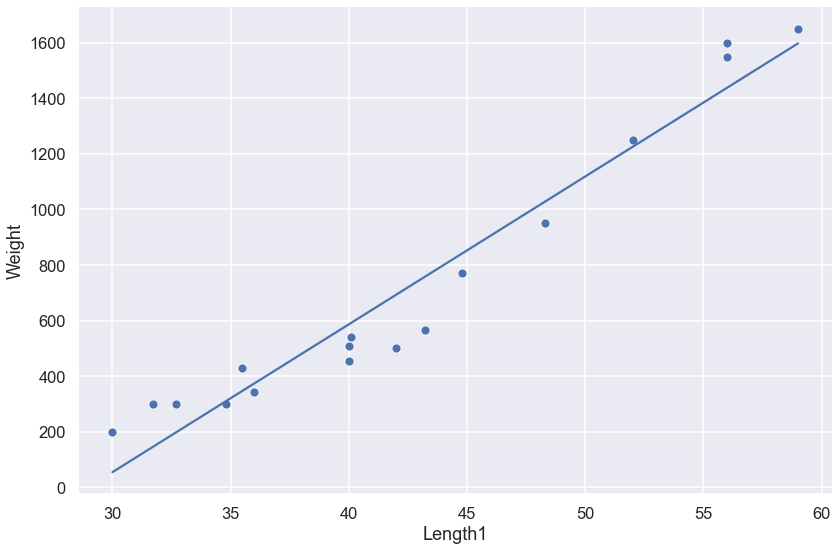

In [27]:
import matplotlib.pyplot as plt
import numpy


# Generate an array of 2 points at the smallest and largest x values in the dataset:
x_min = min(x["Length1"])
x_max = max(x["Length1"])

x_pred = numpy.array([x_min, x_max])
# Create the corresponding y values for the two X points using the linear equation:
y_pred = intercept + (slope * x_pred)


seaborn.relplot(x="Length1", y="Weight", data=pike_dataframe, height=8, aspect=1.5)
plt.plot(x_pred, y_pred)

In [25]:
x_pred

array(['Length1', 'Length1'], dtype='<U7')

## Predicting

We don't have to manually predict fish weights from a list of given lengths by manually calculating them using the model's coefficients. The instance of our `LinearRegression` class has a method called `fit()` that takes a list of lengths and gives us a the corresponding list of heights.

In [8]:
new_x_values = pandas.DataFrame([37.8, 45.3, 52.2], columns=["Length1"])
pike_model.predict(new_x_values)

array([ 469.94165678,  868.90315063, 1235.94772497])

## Evaluating the model

Remember **mean-squared error**?

$$
MSE = \frac{1}{n}\sum_{i=1}^{n} ({Y_{i} - \hat{Y_{i}}})^2
$$


<img src="https://mazelife.github.io/cmsc-210/images/lin-reg-residuals.png" alt="Residuals" style="width: 400px;"/>    

Let's calculate it! Scikit-learn will help us here, we just need to give it two arrays: one of predicted y values and one of actual y values.

In [9]:
from sklearn.metrics import mean_squared_error

predicted_y = pike_model.predict(x)
pike_mse = mean_squared_error(y, predicted_y)

print(f"Our model has a mean squared error of: {pike_mse:,.2f}")
pandas.DataFrame({'Actual': y, 'Predicted': predicted_y})

Our model has a mean squared error of: 12,692.68


,Actual,Predicted
128,200.0,55.021703
129,300.0,145.452975
130,300.0,198.647841
131,300.0,310.357059
132,430.0,347.593465
133,345.0,374.190898
134,456.0,586.970362
135,510.0,586.970362
136,540.0,592.289848
137,500.0,693.360093


## Other goodness-of-fit measures: R-squared

Also known as the coefficient of determination. It is:

$$
R^2 = \frac{\textrm{Variance explained by model}}{\textrm{Total variance}}
$$


We calculate two values to get this:

1. $SSE$ - Sum of Squared Errors (see MSE)
2. $SST$ - Sum of squares total

$SST$ is calculated by:
$$
\textrm{SST} = \sum_{i=1}^{n} ({Y_{i} - \bar{Y_{i}}})^2
$$

Finally:

$$
R^2 = \frac{SST - SSE}{SST} = \frac{\textrm{Variance explained by model}}{\textrm{Total variance}}
$$

This is a percentage, meaning it will give you a value between 0 and 1. The closer to 1, the better your model fit is.

Luckily we don't have to calculate this by hand. Scikit-learn will do this for us:

In [10]:
from sklearn.metrics import r2_score

# This function takes the same arguments sklearn.metrics.mean_squared_error does.
r2_score(y, predicted_y)

0.9447692365485357

## Overfitting

The only problem here is we don't know if we've overfit. 

<img src="https://i.stack.imgur.com/wwhLV.png"  alt="Overfitting" style="width: 1200px;"/>


A better way to measure how well our model is to split our data into training and test datasets. Scikit-learn will help us with this too:

In [20]:
from sklearn.model_selection import train_test_split

# Split 20% of our data off into testing data:
train, test = train_test_split(pike_dataframe, test_size=0.2)

x_train = train[["Length1"]]
y_train = train["Weight"]

x_test = test[["Length1"]]
y_test = test["Weight"]

# Train our model as usual with the 80% of the data we reserved for training:
pike_model = LinearRegression()
pike_model.fit(x_train, y_train)

# Then have it predict X values
predicted_y = pike_model.predict(x_test)
print("Mean-squared error: {:,.2f}".format(mean_squared_error(y_test, predicted_y)))
print("R-squared: {:,.2f}".format(r2_score(y_test, predicted_y) * 100))
pandas.DataFrame({'Actual Weight': y_test, 'Predicted Weight': predicted_y})

Mean-squared error: 24,911.95
R-squared: 56.73


,Actual Weight,Predicted Weight
140,950.0,1055.735080
138,567.0,776.376590
134,456.0,601.092832
129,300.0,146.450583


## Polynomial Regression

Our model works...OK. But the MSE on "real-world" data is somewhat high. You could say that out model under-fits the data. To overcome under-fitting, we need to increase the complexity of the model. What if we try to fit this line with a curve?


In [22]:
from sklearn.preprocessing import PolynomialFeatures 

poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)


poly_pike_model = LinearRegression()
poly_pike_model.fit(x_poly, y)

LinearRegression()

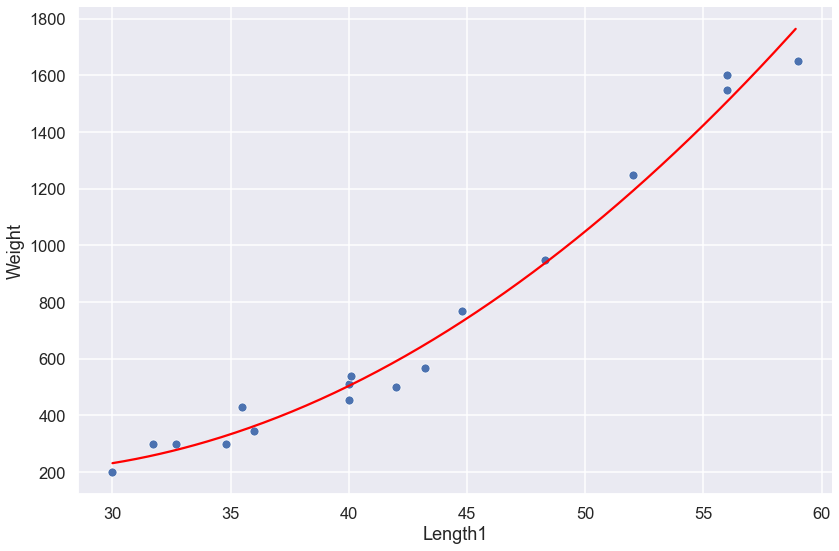

In [35]:
x_min = min(x["Length1"])
x_max = max(x["Length1"])


x_grid = numpy.arange(x_min, x_max, 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

# Create the corresponding y values for the X points using a polynomial model:
y_grid = poly_pike_model.predict(poly_reg.fit_transform(x_grid))

seaborn.relplot(x="Length1", y="Weight", data=pike_dataframe, height=8, aspect=1.5)
plt.plot(x_grid, y_grid, color="red")

A second-degree polynomial linear equation:

$$
y = \beta_0 + \beta_1x + \beta_2x^2
$$

In [51]:
print("beta_0 is {}".format(poly_pike_model.intercept_))
print("beta_1 and beta_2 are {}".format(poly_pike_model.coef_[1:]))


_, beta_1, beta_2 = poly_pike_model.coef_

def predict_y(x):
    return poly_pike_model.intercept_ + (beta_1 * x) + (beta_2 * x * x)


predict_y(40)


beta_0 is 1048.4181803094582
beta_1 and beta_2 are [-68.10909876   1.36275911]


504.46880862618514

In [53]:
predicted_y = poly_pike_model.predict(x_poly)

print("Mean-squared error: {:,.2f}".format(mean_squared_error(y, predicted_y)))
print("R-squared: {:,.2f}".format(r2_score(y, predicted_y) * 100))

Mean-squared error: 3,536.77
R-squared: 98.46
